In [1]:
import pandas as pd 
import numpy as np 


# Data Description (just for reference)

In [2]:
data_dic = pd.read_excel("data_dic.xls")
data_dic 

,Table,Variable,Unnamed: 2,Unnamed: 3,Description,Notes\n
0,Physician characteristics,"""DocID""","""doc""",NaN,Physician ID,NaN
1,NaN,"""M1""","""md_1icu""",NaN,Indicates how many sites is this physician wor...,1 : working at only 1 ICU site \n2+: working ...
2,NaN,"""M2""","""md_leader""",NaN,Does this physician have a leadership role in ...,A physician is categorized into a leadership g...
3,NaN,"""M3""","""md_posbin""",NaN,Indicates the rank of a physician (senior/junior),A physician is categorized into a senior group...
4,NaN,"""M4""","""ov""",NaN,Average overall score from survey in 2016,This average overall score was collected in 20...
5,NaN,"""M5""","""reseval16_grp""",NaN,Resident evaluation ranking group in 2016,The physician’s performance was ranked by resi...
6,NaN,"""M6""","""md_sex""",NaN,Sex,Male or Female
7,NaN,"""M7""","""md_train""",NaN,In what domain has the physician received trai...,"Emergency, Respiratory, Internal Medicine, Pul..."
8,NaN,"""M8""","""md_age_ge50""",NaN,Age >= 50,NaN
9,NaN,"""M9""","""md_edu""",NaN,Education,"MSC, MED, PhD"


## doctors background

In [3]:
doc= pd.read_csv("doctor_characteristic_data.csv")
doc.head()

,DocID,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,doc-01,2+,leader_x,senior,4.033301,2,F,anesthesia,50+,NaN
1,doc-02,2+,leader_x,senior,4.483527,2,M,internal medicine,50+,MSc
2,doc-03,2+,leader_x,junior,4.256743,2,F,pulmonary medicine,<50,PhD
3,doc-04,1,leader,junior,4.175182,3,F,emergency,<50,NaN
4,doc-05,1,leader_x,junior,5.610845,1,M,internal medicine,50+,MMed


## Data for doctors 360 feedback

In [4]:
doc_ev= pd.read_csv("360_doc_feedback.csv")
doc_ev.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,DocID,position
0,4.0,5.0,5.0,5.0,4.0,5.0,2,5.0,4.0,3.0,...,5.0,5.0,4.0,5.0,5.0,NaN,4.0,3.0,doc-09,bedside
1,4.0,5.0,5.0,5.0,5.0,4.0,4,3.0,5.0,5.0,...,5.0,3.0,3.0,3.0,NaN,3.0,4.0,5.0,doc-17,bedside
2,4.0,4.0,5.0,3.0,5.0,4.0,3,4.0,5.0,5.0,...,5.0,5.0,2.0,4.0,NaN,4.0,3.0,5.0,doc-15,bedside
3,5.0,5.0,5.0,5.0,4.0,4.0,3,4.0,5.0,5.0,...,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,doc-01,bedside
4,5.0,5.0,5.0,4.0,5.0,3.0,4,5.0,5.0,3.0,...,4.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,doc-05,non-bedside


In [5]:
df1 = doc_ev.groupby(['DocID','position']).mean()
df1

Q1        Q2        Q3        Q4        Q5  \
DocID  position                                                        
doc-01 bedside      4.173913  4.181818  4.521739  4.217391  4.050000   
       non-bedside  5.000000  3.500000  4.666667  4.333333  4.200000   
doc-02 bedside      4.372093  4.523810  4.214286  4.181818  4.414634   
       non-bedside  4.000000  4.384615  4.071429  4.500000  4.461538   
doc-03 bedside      4.257143  4.483871  4.235294  4.200000  4.548387   
       non-bedside  4.538462  4.454545  4.500000  4.583333  4.272727   
doc-04 bedside      4.379310  4.354839  3.821429  4.451613  4.413793   
       non-bedside  4.411765  4.312500  3.941176  4.117647  4.647059   
doc-05 bedside      4.454545  4.391304  4.500000  4.565217  4.090909   
       non-bedside  4.545455  4.454545  4.500000  4.416667  4.250000   
doc-06 bedside      4.357143  4.071429  4.466667  4.375000  4.533333   
       non-bedside  5.000000  4.400000  4.000000  4.200000  4.400000   
doc-07 bedside      4.411765  3.933333  4.588235  4.562500  4.235294   
       non-bedside  4.000000  4.166667  4.000000  4.000000  3.600000   
doc-08 bedside      4.500000  4.200000  4.050000  4.590909  4.650000   
       non-bedside  4.500000  4.714286  4.285714  4.714286  4.666667   
doc-09 bedside      4.272727  4.636364  4.434783  4.208333  4.727273   
       non-bedside  4.666667  4.625000  3.428571  4.222222  4.222222   
doc-10 bedside      4.769231  4.416667  4.416667  4.428571  4.214286   
       non-bedside  4.571429  4.714286  4.000000  5.000000  4.571429   
doc-11 bedside      4.625000  4.250000  4.000000  4.500000  4.500000   
       non-bedside  3.250000  4.750000  4.500000  4.250000  4.333333   
doc-12 bedside      4.608696  4.333333  4.347826  4.217391  4.619048   
       non-bedside  4.750000  3.500000  4.666667  4.750000  4.250000   
doc-13 bedside      4.636364  4.142857  4.428571  4.450000  4.650000   
       non-bedside  4.833333  4.272727  4.333333  4.500000  4.333333   
doc-14 bedside      4.222222  4.333333  4.500000  4.333333  4.222222   
       non-bedside  3.333333  4.000000  4.000000  4.000000  3.333333   
doc-15 bedside      4.404762  4.309524  4.476190  4.238095  4.461538   
       non-bedside  4.500000  4.529412  3.941176  4.222222  4.352941   
doc-16 bedside      3.714286  4.461538  4.750000  4.428571  4.285714   
       non-bedside  4.500000  3.500000  4.000000  3.500000  4.500000   
doc-17 bedside      4.454545  4.558140  4.348837  4.454545  4.512821   
       non-bedside  4.050000  4.400000  4.000000  4.476190  4.105263   
doc-18 bedside      4.235294  4.277778  4.235294  4.176471  4.666667   
       non-bedside  4.500000  4.000000  4.444444  4.777778  4.222222   
doc-19 bedside      4.450000  4.315789  4.470588  4.368421  4.421053   
       non-bedside  4.555556  4.444444  3.833333  4.111111  4.444444   
doc-20 bedside      4.607143  4.481481  4.142857  4.000000  4.518519   
       non-bedside  4.714286  4.214286  4.076923  4.692308  4.500000   
doc-21 bedside      4.550000  4.285714  4.300000  4.333333  4.285714   
       non-bedside  4.000000  4.600000  4.000000  4.166667  4.400000   
doc-22 bedside      4.500000  4.375000  4.458333  4.583333  4.347826   
       non-bedside  4.750000  4.777778  4.375000  4.444444  4.333333   
doc-23 bedside      4.714286  4.600000  4.357143  4.384615  4.600000   
       non-bedside  4.600000  4.400000  4.800000  4.000000  4.600000   
doc-24 bedside      4.631579  4.473684  4.421053  4.411765  3.866667   
       non-bedside  4.000000  3.777778  4.111111  4.250000  3.777778   
doc-25 bedside      4.100000  4.500000  4.100000  4.444444  4.444444   
       non-bedside  4.800000  3.800000  3.800000  4.600000  4.000000   

                          Q6        Q7        Q8        Q9       Q10  ...  \
DocID  position                                                       ...   
doc-01 bedside      3.875000  3.333333  4.260870  4.333333  4.208333  ...   
       non-bedside  3.833333  4.000000  4.333333  

In [6]:
df2 = doc_ev.groupby(['DocID']).mean()
df2

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
DocID,,,,,,,,,,,,,,,,,,,,,
doc-01,4.344828,4.076923,4.551724,4.241379,4.080000,3.866667,3.466667,4.275862,4.333333,4.266667,...,4.392857,4.068966,4.034483,4.321429,4.428571,4.333333,4.777778,4.107143,4.392857,4.392857
doc-02,4.280702,4.490909,4.178571,4.258621,4.425926,4.033898,3.440678,4.267857,4.185185,4.210526,...,4.423729,4.052632,4.338983,4.160714,4.250000,4.456140,4.473684,4.210526,4.370370,4.206897
doc-03,4.333333,4.476190,4.304348,4.297872,4.476190,4.041667,3.541667,3.957447,4.500000,4.437500,...,4.354167,4.318182,4.187500,4.312500,4.372093,4.282609,4.416667,4.229167,4.285714,4.173913
doc-04,4.391304,4.340426,3.866667,4.333333,4.500000,3.933333,3.437500,3.833333,4.386364,4.234043,...,4.500000,4.083333,4.208333,4.191489,4.418605,4.312500,4.450000,4.000000,4.190476,4.239130
doc-05,4.484848,4.411765,4.500000,4.514286,4.147059,4.176471,3.714286,4.171429,4.580645,4.235294,...,4.257143,4.382353,4.294118,4.028571,4.187500,4.382353,4.600000,4.096774,4.451613,4.029412
doc-06,4.526316,4.157895,4.350000,4.333333,4.500000,4.047619,3.857143,4.100000,4.380952,3.857143,...,4.476190,4.333333,4.315789,4.285714,4.350000,4.450000,4.600000,4.350000,4.277778,4.157895
doc-07,4.304348,4.000000,4.434783,4.409091,4.090909,4.045455,3.478261,4.619048,4.090909,4.347826,...,4.500000,4.227273,4.000000,4.090909,4.380952,4.217391,4.666667,3.954545,4.166667,4.238095
doc-08,4.500000,4.333333,4.111111,4.620690,4.653846,4.233333,3.433333,4.275862,4.571429,4.133333,...,4.333333,4.266667,4.100000,4.034483,4.407407,4.366667,4.687500,4.344828,4.500000,4.400000
doc-09,4.387097,4.633333,4.200000,4.212121,4.580645,4.218750,3.424242,4.066667,4.193548,4.187500,...,4.656250,4.181818,3.969697,4.060606,4.461538,4.419355,4.666667,4.607143,4.071429,3.939394


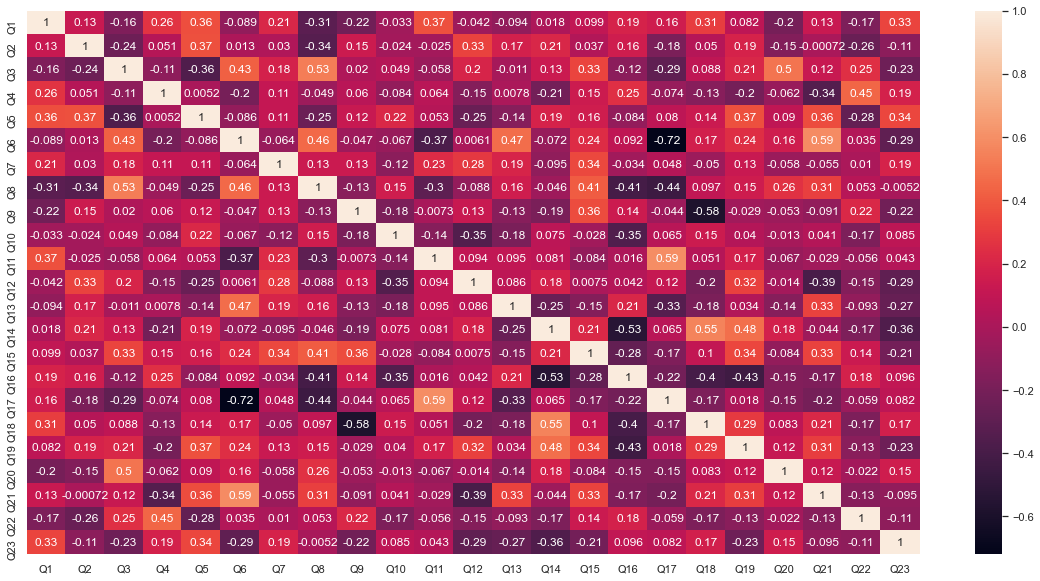

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20 ,10)})
corrMatrix = df2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### combining all the  DOC data (USE this) 


In [8]:
doc_all = pd.merge(doc, df2, on ="DocID")
doc_all

,DocID,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,doc-01,2+,leader_x,senior,4.033301,2,F,anesthesia,50+,NaN,...,4.392857,4.068966,4.034483,4.321429,4.428571,4.333333,4.777778,4.107143,4.392857,4.392857
1,doc-02,2+,leader_x,senior,4.483527,2,M,internal medicine,50+,MSc,...,4.423729,4.052632,4.338983,4.160714,4.250000,4.456140,4.473684,4.210526,4.370370,4.206897
2,doc-03,2+,leader_x,junior,4.256743,2,F,pulmonary medicine,<50,PhD,...,4.354167,4.318182,4.187500,4.312500,4.372093,4.282609,4.416667,4.229167,4.285714,4.173913
3,doc-04,1,leader,junior,4.175182,3,F,emergency,<50,NaN,...,4.500000,4.083333,4.208333,4.191489,4.418605,4.312500,4.450000,4.000000,4.190476,4.239130
4,doc-05,1,leader_x,junior,5.610845,1,M,internal medicine,50+,MMed,...,4.257143,4.382353,4.294118,4.028571,4.187500,4.382353,4.600000,4.096774,4.451613,4.029412
5,doc-06,2+,leader,senior,5.737756,2,M,medicine,50+,MSc,...,4.476190,4.333333,4.315789,4.285714,4.350000,4.450000,4.600000,4.350000,4.277778,4.157895
6,doc-07,1,leader_x,junior,5.186852,2,M,internal medicine,<50,NaN,...,4.500000,4.227273,4.000000,4.090909,4.380952,4.217391,4.666667,3.954545,4.166667,4.238095
7,doc-08,1,leader_x,senior,4.240653,2,F,pulmonary medicine,<50,NaN,...,4.333333,4.266667,4.100000,4.034483,4.407407,4.366667,4.687500,4.344828,4.500000,4.400000
8,doc-09,1,leader_x,junior,3.995118,2,F,internal medicine,50+,NaN,...,4.656250,4.181818,3.969697,4.060606,4.461538,4.419355,4.666667,4.607143,4.071429,3.939394
9,doc-10,1,leader_x,junior,4.726975,3,M,internal medicine,50+,NaN,...,4.700000,4.100000,4.200000,4.238095,4.444444,4.315789,4.555556,3.900000,4.368421,4.095238


## Data for patients 

In [20]:
patients = pd.read_csv("patient_data.csv")
patients.head()

,DocID,PtID,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,doc-01,101103,lt60,no_op,medical,1,27,11,M,A,10,cardiovascular
1,doc-01,101108,lt60,no_op,medical,3,22,5,M,A,6,cardiovascular
2,doc-01,101151,ge60,no_op,medical,3,22,5,F,A,10,cardiovascular
3,doc-01,101551,lt60,no_op,medical,3,21,6,M,A,8,cardiovascular
4,doc-01,102061,ge60,no_op,medical,2,24,6,F,A,6,cardiovascular


## patient's SOFA data 

In [10]:
patients = pd.read_csv("patient_SOFA.csv")
patients.head()

,PtID,day,SOFA
0,101008,0,7
1,101008,1,13
2,101008,2,11
3,101008,3,11
4,101008,4,8


In [16]:
df = patients.groupby("PtID")\
        .agg({'day':'count','SOFA':'mean'})\
        .rename(columns = {'day':'day_count','SOFA':'SOFA_mean'})


In [17]:
df

,day_count,SOFA_mean
PtID,,
101008,21,8.190476
101010,7,9.000000
101011,4,3.750000
101033,2,7.000000
101036,4,8.500000
...,...,...
505244,7,4.428571
505254,2,8.000000
505264,12,4.916667


In [21]:
df3 = pd.merge(patients, df, on ="PtID")

In [22]:
df3.head()

,DocID,PtID,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,day_count,SOFA_mean
0,doc-01,101103,lt60,no_op,medical,1,27,11,M,A,10,cardiovascular,11,7.818182
1,doc-01,101108,lt60,no_op,medical,3,22,5,M,A,6,cardiovascular,7,2.857143
2,doc-01,101151,ge60,no_op,medical,3,22,5,F,A,10,cardiovascular,11,6.272727
3,doc-01,101551,lt60,no_op,medical,3,21,6,M,A,8,cardiovascular,9,4.222222
4,doc-01,102061,ge60,no_op,medical,2,24,6,F,A,6,cardiovascular,7,8.714286


In [15]:
# df2.groupby(['DocID','PtID']).count()

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('SOFA_mean ~DocID', data=df3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
DocID,265.333131,24.0,1.781924,0.011171
Residual,12954.528626,2088.0,NaN,NaN


In [27]:
SOFA_mean= df["SOFA_mean"]

In [28]:
from scipy import stats
import numpy as np
mean, sigma = np.mean(SOFA_mean), np.std(SOFA_mean)

conf_int = stats.norm.interval(0.68, loc=mean, 
    scale=sigma)
conf_int

(4.589342079882261, 9.564193319346195)